In [2]:
from packages import *

In [3]:
plt.style.use('dark_background')
# plt.style.use('default')

In [4]:
df = pd.read_csv('./data/kc_house_data.csv')

# Clean data from null values

In [5]:
df.dropna(inplace=True)

<font size="5"> Remove all negative values for a given set of fields if they exists</font>

In [6]:
df2 = df.copy()
for idx, column_name in enumerate(df.columns):
    if idx in [0,1,17,18]: continue
    if idx > 2: continue
    df2 = df2[df2[column_name] >= 0]
    
display(df.shape[0] - df2.shape[0])
df = df2
del df2

0

<font size="5"> Remove houses with 0 bedrooms or 0 bathrooms</font>

In [7]:
df = df[df['bedrooms'] != 0]
df = df[df['bathrooms'] != 0]

# Select data in percentil range 

 * Map all the 95th percentils of a given set of fields
 * Use these values as parameters to select more representative set of values
 * Ps: Whatch out! Avoid to retrieve the 95th percentils from another 95th percentil

In [8]:
cond1 = df['price'] <= df['price'].quantile(.95)
cond2 = df['bedrooms'] <= df['bedrooms'].quantile(.95)
cond3 = df['sqft_lot'] <= df['sqft_lot'].quantile(.95)
cond3 = df['sqft_lot15'] <= df['sqft_lot15'].quantile(.95)
df = df[cond1 & cond2]

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft

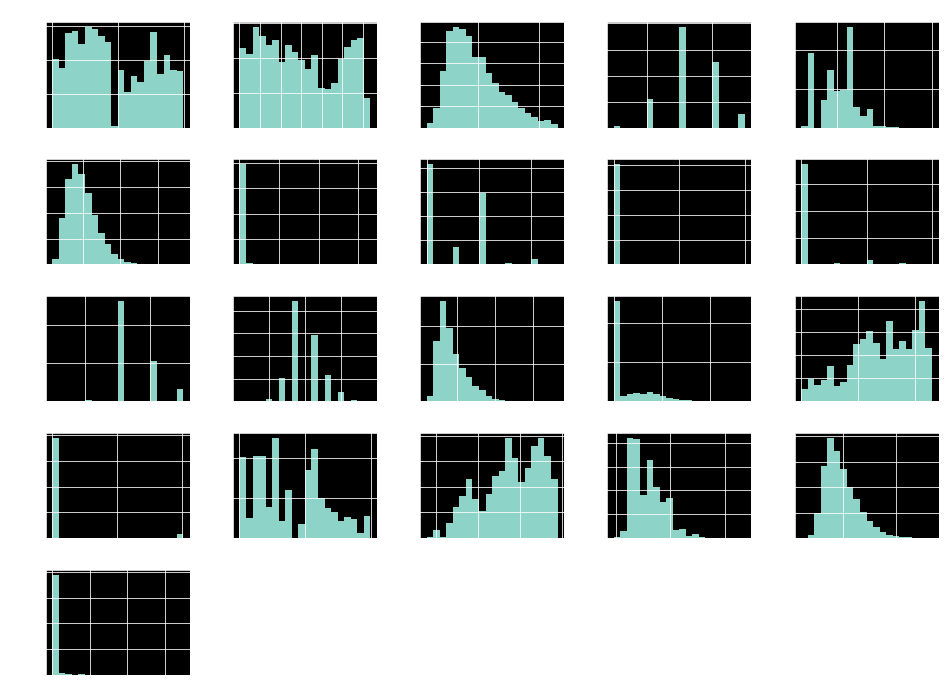

In [16]:
df.hist(bins=20, figsize=(16,12))

<AxesSubplot:>

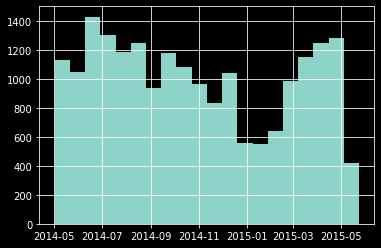

In [15]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.date.hist(bins=20)

# Traform

In [8]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

# Store

In [9]:
#%store df
df.to_csv('./data_notebooks/clean_data.csv', index=False)

In [ ]:

df[df['bedrooms']==0]

# Draft

In [ ]:
(df['sqft_lot'].max(), df['sqft_lot'].mean(), df['sqft_lot15'].max(), df['sqft_lot15'].mean())